In [1]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [2]:
!wget $url

--2023-09-26 07:57:22--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   1.41M  1.33MB/s    in 1.1s    

2023-09-26 07:57:24 (1.33 MB/s) - ‘data.csv.3’ saved [1475504/1475504]



In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
sttrings = list(df.dtypes[df.dtypes=='object'].index)

In [7]:
for string in sttrings:
    df[string] = df[string].str.lower().str.replace(' ','_')

In [8]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


In [9]:
df.dtypes[df.dtypes=='int64']

year           int64
highway_mpg    int64
city_mpg       int64
popularity     int64
msrp           int64
dtype: object

In [10]:
for col in df.columns:
    print(df[col].unique()[:3])
    print(df[col].nunique())

['bmw' 'audi' 'fiat']
48
['1_series_m' '1_series' '100']
914
[2011 2012 2013]
28
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)']
10
[335. 300. 230.]
356
[6. 4. 5.]
9
['manual' 'automatic' 'automated_manual']
5
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive']
4
[2. 4. 3.]
3
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance']
71
['compact' 'midsize' 'large']
3
['coupe' 'convertible' 'sedan']
16
[26 28 27]
59
[19 20 18]
69
[3916 3105  819]
48
[46135 40650 36350]
6049


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

<Axes: xlabel='msrp', ylabel='Count'>

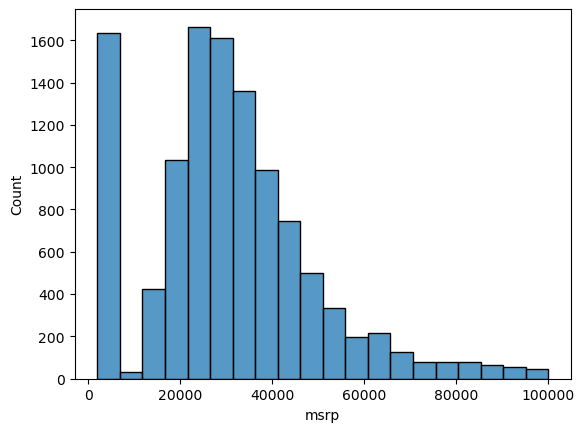

In [12]:
sb.histplot(df.msrp[df.msrp < 100000],bins=20)

In [13]:
np.log1p([0,1,2,3,4])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [14]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

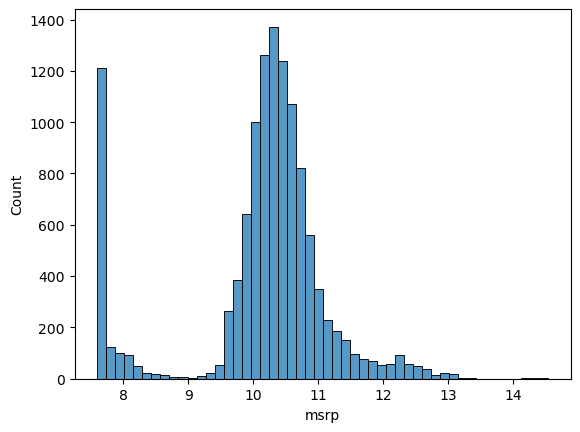

In [15]:
sb.histplot(price_logs,bins=50)

In [16]:
n = len(df)
validation = int(n * 0.2)
test = int(n* 0.2)
train = n - validation - test
print(n,validation,test,train,sep=',')

11914,2382,2382,7150


In [17]:
import numpy as np
import random
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([1547, 5416, 1492, ..., 5714, 9623, 2953])

In [18]:
df_train = df.iloc[idx[:train]]
df_val = df.iloc[idx[train:train+test]]
df_test = df.iloc[idx[train+test:]]

In [19]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1547,cadillac,ats,2016,regular_unleaded,335.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,28,19,1624,47155
5416,volkswagen,golf_r,2016,premium_unleaded_(recommended),292.0,4.0,automated_manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,30,23,873,36750
1492,cadillac,ats_coupe,2015,premium_unleaded_(recommended),272.0,4.0,automatic,all_wheel_drive,2.0,"luxury,performance",compact,coupe,29,20,1624,46935
3573,mitsubishi,diamante,2004,premium_unleaded_(required),210.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,23,15,436,26819
1641,chevrolet,aveo,2010,regular_unleaded,108.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,35,27,1385,12115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,bentley,continental_gt,2015,flex-fuel_(premium_unleaded_required/e85),626.0,12.0,automatic,all_wheel_drive,2.0,"exotic,flex_fuel,factory_tuner,luxury,high-per...",midsize,coupe,21,12,520,227600
3224,cadillac,cts_wagon,2012,regular_unleaded,270.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,26,18,1624,44050
1243,honda,accord,2016,regular_unleaded,185.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,37,27,2202,26380
4722,honda,fit,2017,regular_unleaded,130.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,36,29,2202,17900


In [20]:
df_train.reset_index(drop=True,inplace=True)

In [21]:
df_test.reset_index(drop=True,inplace=True)

In [22]:
df_val.reset_index(drop=True,inplace=True)

In [23]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,cadillac,ats,2016,regular_unleaded,335.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,28,19,1624,47155
1,volkswagen,golf_r,2016,premium_unleaded_(recommended),292.0,4.0,automated_manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,30,23,873,36750
2,cadillac,ats_coupe,2015,premium_unleaded_(recommended),272.0,4.0,automatic,all_wheel_drive,2.0,"luxury,performance",compact,coupe,29,20,1624,46935
3,mitsubishi,diamante,2004,premium_unleaded_(required),210.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,23,15,436,26819
4,chevrolet,aveo,2010,regular_unleaded,108.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,35,27,1385,12115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bentley,continental_gt,2015,flex-fuel_(premium_unleaded_required/e85),626.0,12.0,automatic,all_wheel_drive,2.0,"exotic,flex_fuel,factory_tuner,luxury,high-per...",midsize,coupe,21,12,520,227600
7146,cadillac,cts_wagon,2012,regular_unleaded,270.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,26,18,1624,44050
7147,honda,accord,2016,regular_unleaded,185.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,37,27,2202,26380
7148,honda,fit,2017,regular_unleaded,130.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,36,29,2202,17900


In [24]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [25]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [26]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,xc70,2016,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,wagon,31,23,870
1,nissan,350z,2008,regular_unleaded,306.0,6.0,manual,rear_wheel_drive,2.0,high-performance,compact,coupe,25,18,2009
2,kia,sorento,2017,regular_unleaded,290.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,23,17,1720
3,gmc,sierra_1500_classic,2007,regular_unleaded,195.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,17,14,549
4,chevrolet,corvette,2016,premium_unleaded_(required),650.0,8.0,manual,rear_wheel_drive,2.0,"factory_tuner,high-performance",compact,convertible,22,15,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,chevrolet,trailblazer,2008,regular_unleaded,285.0,6.0,automatic,rear_wheel_drive,4.0,NaN,midsize,4dr_suv,20,14,1385
2378,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
2379,mazda,mx-5_miata,2016,premium_unleaded_(recommended),155.0,4.0,automatic,rear_wheel_drive,2.0,performance,compact,convertible,36,27,586
2380,mazda,cx-9,2014,regular_unleaded,273.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,4dr_suv,22,16,586


In [27]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [28]:
w = [w0] + w

In [29]:
xi = [1] + xi

In [30]:
%whos

Variable     Type         Data/Info
-----------------------------------
col          str          msrp
df           DataFrame              make       mode<...>[11914 rows x 16 columns]
df_test      DataFrame                make         <...>n[2382 rows x 15 columns]
df_train     DataFrame                make         <...>n[7150 rows x 15 columns]
df_val       DataFrame                  make       <...>n[2382 rows x 15 columns]
idx          ndarray      11914: 11914 elems, type `int64`, 95312 bytes
n            int          11914
np           module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd           module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt          module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
price_logs   Series       0        10.739349\n1    <...>th: 11914, dtype: float64
random       module       <module 'random' from '/h<...>ib/python3.11/random.py'>
sb           module       <module 'seaborn' from '/<...

In [31]:
def linear_regression(xi):
    return w0 + np.array(xi) @ np.array(w)

In [32]:
res = linear_regression(xi)

In [33]:
res_exp = np.expm1(res)

In [34]:
X = [
 [148,24,1385],
 [132,25,2031],
 [453,11,86],
 [158,24,185],
 [172,25,201],
 [413,11,86],
 [38,54,185],
 [142,25,431],
 [453,31,86]
]
X = np.array(X)

In [35]:
X = np.column_stack([np.ones(X.shape[0]),X])

In [36]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [37]:
def train_linear_regression(X,y):
    X = np.column_stack([np.ones(X.shape[0]),X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    res = XTX_inv.dot(X.T).dot(y)
    return res[0],res[1:]
    

In [38]:
XTX = X.T.dot(X)

In [39]:
XTX_inv = np.linalg.inv(XTX)

In [40]:
y = [100, 200, 150, 250,100, 200, 150, 250,120] 

In [41]:
res = XTX_inv.dot(X.T).dot(y)

In [42]:
res[0],res[1:]

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [43]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [44]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [49]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

In [48]:
df_train[base].fillna(0).values

array([[ 335.,    6.,   28.,   19., 1624.],
       [ 292.,    4.,   30.,   23.,  873.],
       [ 272.,    4.,   29.,   20., 1624.],
       ...,
       [ 185.,    4.,   37.,   27., 2202.],
       [ 130.,    4.,   36.,   29., 2202.],
       [ 131.,    4.,   26.,   24., 2009.]])

In [50]:
df_train[base].isnull().sum()

engine_hp           44
engine_cylinders    17
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [52]:
X_train = df_train[base].fillna(0).values

In [53]:
w0,w = train_linear_regression(X_train,y_train)

In [54]:
y_pred = w0 +  X_train.dot(w)

<Axes: ylabel='Count'>

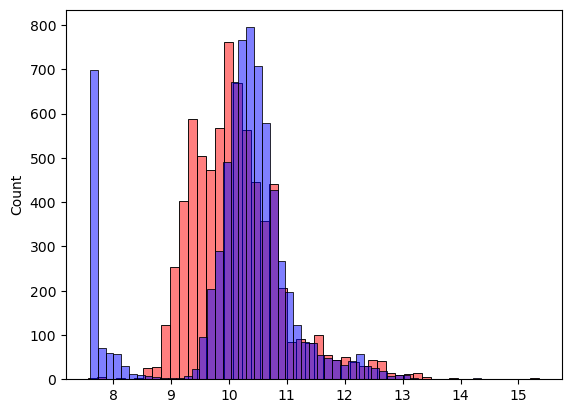

In [55]:
import seaborn as sns
sns.histplot(y_pred,color = 'red',alpha = 0.5,bins=50)
sns.histplot(y_train,color = 'blue',alpha = 0.5,bins = 50)

In [56]:
def rme(y,y_pred):
    s = y - y_pred
    sq_s = s ** 2
    mse = sq_s.mean()
    return np.sqrt(mse)

In [57]:
rme(y_train,y_pred)

0.745996529089949

In [58]:
def prepare_X(df):
    df = df.copy()
    base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
    df['age'] = max(df.year.values) - df.year
    base = base + ['age']
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors==v).astype('int')
        base.append(f'num_doors_{v}')
    df_num = df[base]
    X = df_num.fillna(0).values
    return X

In [60]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,ats,2016,regular_unleaded,335.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,28,19,1624
1,volkswagen,golf_r,2016,premium_unleaded_(recommended),292.0,4.0,automated_manual,all_wheel_drive,4.0,"hatchback,factory_tuner,high-performance",compact,4dr_hatchback,30,23,873
2,cadillac,ats_coupe,2015,premium_unleaded_(recommended),272.0,4.0,automatic,all_wheel_drive,2.0,"luxury,performance",compact,coupe,29,20,1624
3,mitsubishi,diamante,2004,premium_unleaded_(required),210.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,23,15,436
4,chevrolet,aveo,2010,regular_unleaded,108.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,35,27,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bentley,continental_gt,2015,flex-fuel_(premium_unleaded_required/e85),626.0,12.0,automatic,all_wheel_drive,2.0,"exotic,flex_fuel,factory_tuner,luxury,high-per...",midsize,coupe,21,12,520
7146,cadillac,cts_wagon,2012,regular_unleaded,270.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,26,18,1624
7147,honda,accord,2016,regular_unleaded,185.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,37,27,2202
7148,honda,fit,2017,regular_unleaded,130.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,36,29,2202


In [61]:
X_train = prepare_X(df_train)

In [62]:
X_train

array([[335.,   6.,  28., ...,   0.,   0.,   1.],
       [292.,   4.,  30., ...,   0.,   0.,   1.],
       [272.,   4.,  29., ...,   1.,   0.,   0.],
       ...,
       [185.,   4.,  37., ...,   0.,   0.,   1.],
       [130.,   4.,  36., ...,   0.,   0.,   1.],
       [131.,   4.,  26., ...,   0.,   0.,   1.]])

In [63]:
w0,w = train_linear_regression(X_train,y_train)

In [64]:
X_val = prepare_X(df_val)

In [65]:
y_pred = w0 + X_val.dot(w)

In [66]:
rme(y_val,y_pred)

0.5132870362730916

<Axes: ylabel='Count'>

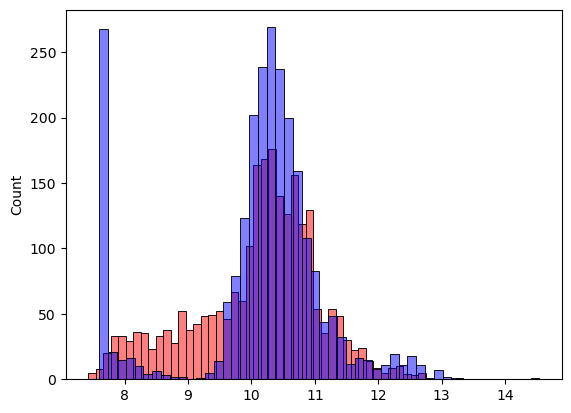

In [67]:
import seaborn as sns
sns.histplot(y_pred,color = 'red',alpha = 0.5,bins=50)
sns.histplot(y_val,color = 'blue',alpha = 0.5,bins = 50)

In [75]:
car_makes = list(df.make.value_counts().head().index)

In [84]:
def prepare_X(df):
    df = df.copy()
    base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
    df['age'] = max(df.year.values) - df.year
    base = base + ['age']
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors==v).astype('int')
        base.append(f'num_doors_{v}')
    for make in car_makes:
        df[f'make_{make}'] = (df.make==make).astype('int')
        base.append(f'make_{make}')
    print(df[base])
    df_num = df[base]
    X = df_num.fillna(0).values
    return X

In [85]:
X_train = prepare_X(df_train)

      engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity  age  \
0         335.0               6.0           28        19        1624    1   
1         292.0               4.0           30        23         873    1   
2         272.0               4.0           29        20        1624    2   
3         210.0               6.0           23        15         436   13   
4         108.0               4.0           35        27        1385    7   
...         ...               ...          ...       ...         ...  ...   
7145      626.0              12.0           21        12         520    2   
7146      270.0               6.0           26        18        1624    5   
7147      185.0               4.0           37        27        2202    1   
7148      130.0               4.0           36        29        2202    0   
7149      131.0               4.0           26        24        2009    0   

      num_doors_2  num_doors_3  num_doors_4  make_chevrolet  make_ford  \
0

In [87]:
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val)

      engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity  age  \
0         240.0               4.0           31        23         870    1   
1         306.0               6.0           25        18        2009    9   
2         290.0               6.0           23        17        1720    0   
3         195.0               6.0           17        14         549   10   
4         650.0               8.0           22        15        1385    1   
...         ...               ...          ...       ...         ...  ...   
2377      285.0               6.0           20        14        1385    9   
2378      148.0               4.0           37        28         640    1   
2379      155.0               4.0           36        27         586    1   
2380      273.0               6.0           22        16         586    3   
2381      565.0              12.0           19        13         259    3   

      num_doors_2  num_doors_3  num_doors_4  make_chevrolet  make_ford  \
0

In [88]:
y_pred = w0 + X_train.dot(w)

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)

(7150, 14)
(7150,)
(2382, 14)


In [90]:
rme(y_train,y_pred)

0.5005077075843256

In [98]:
categorical_variables = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style']

In [97]:
len(categorical_variables)

7

In [99]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [100]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [112]:
def prepare_X(df):
    df = df.copy()
    base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
    df['age'] = max(df.year.values) - df.year
    base = base + ['age']
    for v in [2,3,4]:
        df[f'num_doors_{v}'] = (df.number_of_doors==v).astype('int')
        base.append(f'num_doors_{v}')
    for c,values in categories.items():
        for v in values:
            df[f'{c}_{v}'] = (df[c]==v).astype('int')
            base.append(f'{c}_{v}')
    # print(df[base])
    df_num = df[base]
    X = df_num.fillna(0).values
    return X

In [113]:
X_train = prepare_X(df_train)

In [114]:
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_train.dot(w)

In [115]:
rme(y_train,y_pred)

0.4521472923460664

In [116]:
def train_linear_regression_reg(X,y,r=0.001):
    X = np.column_stack([np.ones(X.shape[0]),X])
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])*r
    XTX_inv = np.linalg.inv(XTX)
    res = XTX_inv.dot(X.T).dot(y)
    return res[0],res[1:]
    

In [117]:
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_train.dot(w)

In [118]:
rme(y_train,y_pred)

0.4521472923460664